# Dealing with Large Axis Ranges

In [1]:
%run helper.py

In [2]:
df = pd.read_csv("../data/nuclear-warhead-inventories/nuclear-warhead-inventories.csv")
df["Total"] = df.set_index(["Entity","Code","Year"]).sum(axis=1).values
df.head(1)

,Entity,Code,Year,Number of deployed strategic nuclear warheads,Number of deployed nonstrategic nuclear warheads,Number of nondeployed nuclear warheads in reserve,Number of retired nuclear warheads,Total
0,China,CHN,2023,0,0,410,0,410


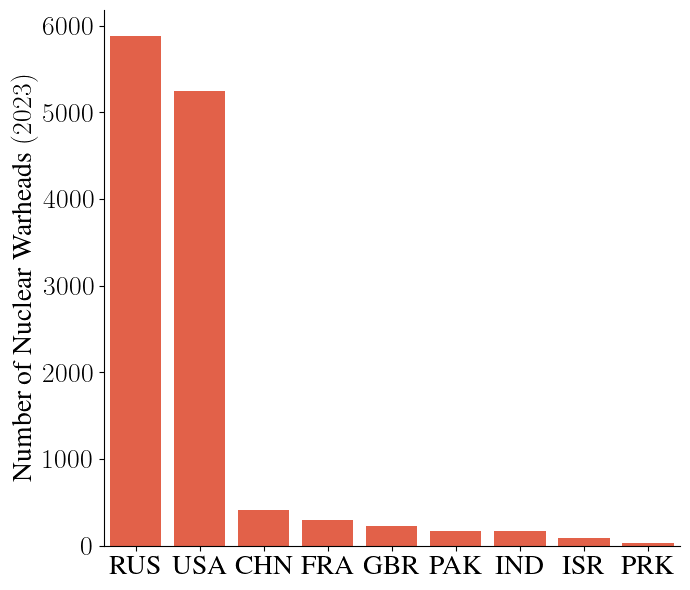

In [3]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
sns.barplot(df.sort_values("Total", ascending=False), x="Code", y="Total", color=cc.glasbey_hv[1], ax=ax)
sns.despine(fig)
ax.set_xlabel("")
ax.set_ylabel("Number of Nuclear Warheads $(2023)$")
plt.tight_layout()
plt.savefig("../figures/part_vs_whole-nuclear_warheads_sorted_bar_all.pdf", bbox_inches="tight", transparent=True)

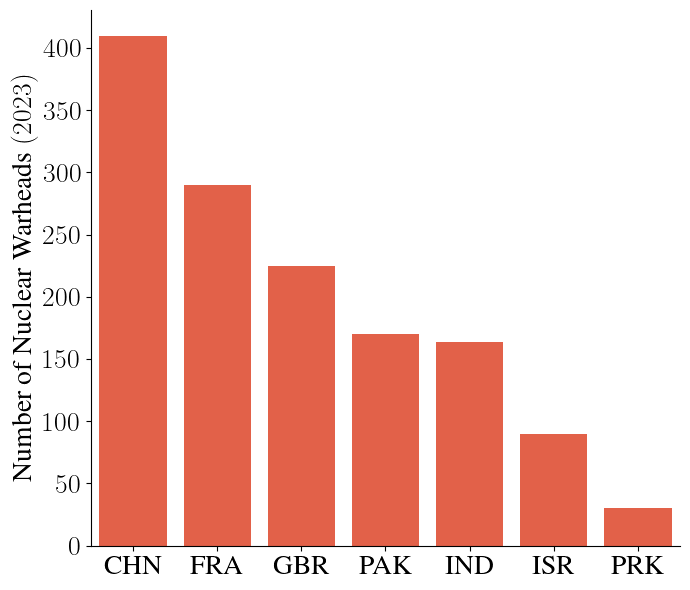

In [4]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
excluded = ["RUS", "USA"]
sns.barplot(df.sort_values("Total", ascending=False).query("Code not in @excluded"), x="Code", y="Total", color=cc.glasbey_hv[1], ax=ax)
sns.despine(fig)
ax.set_xlabel("")
ax.set_ylabel("Number of Nuclear Warheads $(2023)$")
plt.tight_layout()
plt.savefig("../figures/part_vs_whole-nuclear_warheads_sorted_bar_small.pdf", bbox_inches="tight", transparent=True)

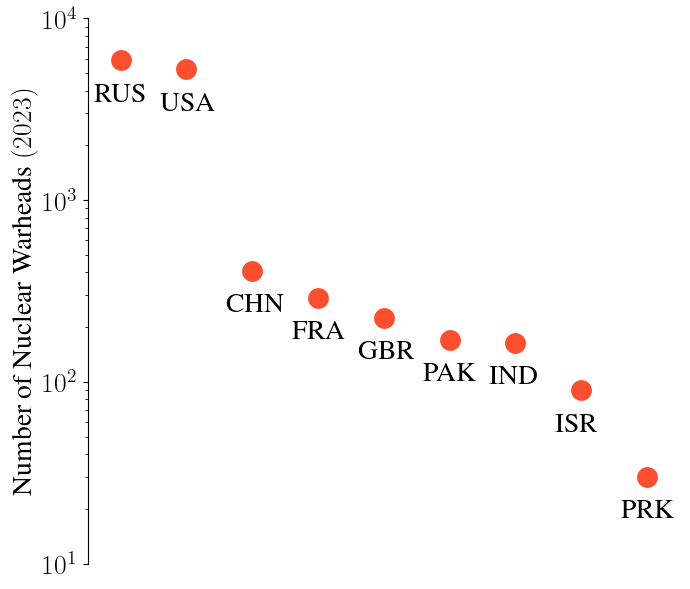

In [5]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
df_indexed = df.sort_values("Total", ascending=False).set_index("Code")
sns.stripplot(df.sort_values("Total", ascending=False), x="Code", y="Total", 
              color=cc.glasbey_hv[1], ax=ax, 
              log_scale=(False, True), s=15
             )
sns.despine(fig, trim=False, bottom=True)
ax.set_xlabel("")
ax.set_ylabel("Number of Nuclear Warheads $(2023)$")
ax.set_yticks([10**1, 10**2, 10**3, 10**4])
ax.set_xticks([])
for idx,x in enumerate(df_indexed.index):
    ax.annotate(x, xy=(idx,df_indexed.loc[x,"Total"]), xytext=(idx-0.4,df_indexed.loc[x,"Total"]-0.4*df_indexed.loc[x,"Total"]), fontsize=20)
plt.tight_layout()
plt.savefig("../figures/part_vs_whole-nuclear_warheads_sorted_dot_all.pdf", bbox_inches="tight", transparent=True)